# Początek zabawy z danymi

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [170]:
RANDOM_SEED = 1

In [171]:
df=pd.read_csv('zbiór_8.csv')

In [172]:
df

,szczegolnaFormaPrawna_Symbol,formaWlasnosci_Symbol,pkdKod,wsk_liczba_dni_istnienia,Aktywa,Aktywa_trwale,Wartosci_niematerialne_prawne,Wartosc_firmy,Rzeczowe_aktywa_trwale,Srodki_trwale,...,wsk_struktura_kap_wlasnego_s_1,wsk_struktura_kap_wlasnego_s_2,wsk_zadluzenia,wsk_zob_dlugoterminowe_aktywa_rzeczowe,wsk_zob_oprocentowanych,wsk_zob_oprocentowanych_aktywa_rzeczowe,wsk_struktura_kap_obcego_s,wsk_zob_s_aktywa_rzeczowe,wsk_fin_majatku_kapitalem,default
0,117,214,7010,4732,31576.85,1000.00,0.00,0.0,0.00,0.00,...,0.533280,0.533280,0.875189,0.466720,0.000000,0.000000,0.466720,0.466720,0.518016,1
1,117,214,4719,3344,10000.00,0.00,0.00,0.0,0.00,0.00,...,0.345640,0.345640,1.893184,0.654360,0.000000,0.000000,0.654360,0.654360,0.345640,1
2,117,215,119,1438,47031653.46,43499012.39,3279.42,0.0,43495732.97,43495732.97,...,0.006746,0.006811,145.736447,0.918424,0.918360,0.918424,0.993254,0.983714,-12.222723,1
3,117,214,111,1811,4323.31,0.00,0.00,0.0,0.00,0.00,...,0.997594,inf,0.002411,0.000000,0.000000,0.000000,0.002406,-0.997594,0.997594,1
4,117,216,6910,1292,454824.30,5109.11,5109.11,0.0,0.00,0.00,...,0.323581,0.697087,2.019511,0.133418,0.000143,0.000145,0.676419,0.140609,0.364058,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,117,214,6201,4314,2406323.55,0.00,0.00,0.0,0.00,0.00,...,0.631274,0.986189,0.584098,0.000000,0.000000,0.000000,0.368726,0.008841,0.631274,0
2996,117,214,7990,1370,18379.63,0.00,0.00,0.0,0.00,0.00,...,0.816179,0.816179,0.225222,0.183821,0.000000,0.000000,0.183821,0.183821,0.816179,0
2997,117,214,5814,2585,63890.31,9800.06,0.00,0.0,0.00,0.00,...,0.142685,0.142685,6.008444,0.857315,0.000000,0.000000,0.857315,0.857315,-0.012643,0
2998,117,215,4120,7853,14173664.14,14062140.06,0.00,0.0,14062140.06,1237803.53,...,0.744294,0.744299,0.343556,0.219826,0.074269,0.074269,0.255706,0.255700,-31.497876,0


In [173]:
df_train, df_tmp = train_test_split(df, train_size=0.7, stratify=df['default'], random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_tmp, test_size=0.5, stratify=df_tmp['default'], random_state=RANDOM_SEED)

## EDA

In [174]:
df_train[['pkdKod','szczegolnaFormaPrawna_Symbol','formaWlasnosci_Symbol']].value_counts().head()

pkdKod  szczegolnaFormaPrawna_Symbol  formaWlasnosci_Symbol
6201    117                           214                      58
6920    117                           214                      54
6820    117                           214                      50
7022    117                           214                      47
4120    117                           214                      46
Name: count, dtype: int64

In [175]:
df_train[['szczegolnaFormaPrawna_Symbol']].value_counts().head()

szczegolnaFormaPrawna_Symbol
117                             2100
Name: count, dtype: int64

In [176]:
df_train[['formaWlasnosci_Symbol']].value_counts()

formaWlasnosci_Symbol
214                      1393
215                       201
216                       165
0                         129
224                        58
226                        47
225                        36
227                        31
113                        20
112                         9
234                         3
111                         3
235                         3
133                         2
Name: count, dtype: int64

#### Znaczenie najczęściej występujących kodów PKD:
- 6201 - oprogramowanie
- 6920 - rachunki, księgowość, doradztwo podatkowe
- 6820 - nieruchomości własne
- 7022 - doradztwo
- 4120 - roboty do wznoszenia budynków

Kolumna szczególna forma prawna przyjmuje tylko jedną wartość, więc do usunięcia.

### Analiza wartości brakujących

#### Czy braki są zależne od PKD?

In [177]:
cols_to_check = [
    'Aktywa', 'Aktywa_obrotowe', 'Aktywa_trwale', 'amortyzacja',
    'dotacje', 'dywidendy_udzialy', 'Inne_rozliczenia_miedzyokresowe',
    'Kapital_podstawowy', 'Kapital_wlasny', 'Kredyty_pozyczki',
    'Naleznosci_krotkoterminowe', 'Srodki_pieniezne', 'Zapasy',
    'Zobowiazania_krotkoterminowe', 'Zobowiazania_dlugoterminowe',
    'Zysk_netto', 'zysk_operacyjny'
]
top_pkd = df_train['pkdKod'].value_counts().head(20).index

In [178]:
df_top_pkd = df_train[df_train['pkdKod'].isin(top_pkd)]

zeros_na_ratio_top = df_top_pkd.groupby('pkdKod')[cols_to_check].apply(lambda x: ((x.isna()) | (x==0)).mean())

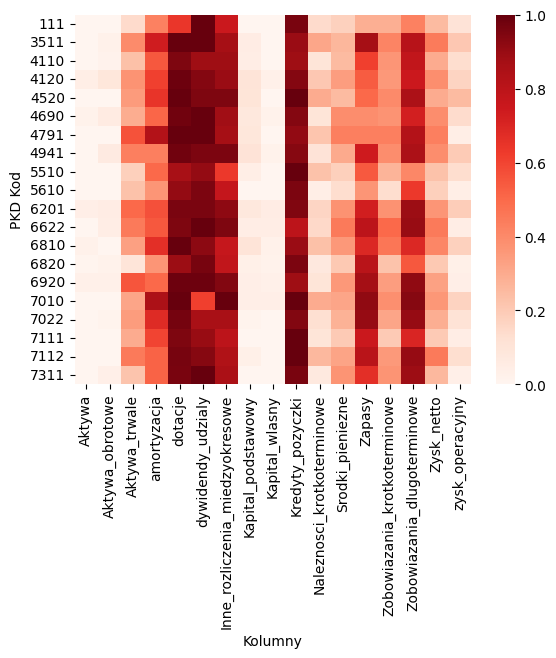

In [179]:
sns.heatmap(zeros_na_ratio_top, cmap='Reds')
plt.xlabel('Kolumny')
plt.ylabel('PKD Kod')
plt.show()

##### Nie widać specjalnej zależności

In [180]:
miss = df_train.isna().sum().sort_values(ascending=False)
miss[miss > 0]

RP_przeplywy_operacyjne             2077
wsk_pokrycie_zob_kr_gotowkowe_2     2077
wsk_zadluzenia_gotowki_2            2077
wsk_akt_generowania_got_2           2077
wsk_pokrycie_wyd_fin_gotowkowe_2    2077
wsk_zysk_CF_operacyjny              2077
RP_amortyzacja                      2018
wsk_plynnosc_biez_1                   65
wsk_kapital_do_aktywa                 29
wsk_struktura_kap_wlasnego_s_2        29
dtype: int64

##### Dane do usunięcia:
wsk_pokrycie_zob_kr_gotowkowe_2     2077

wsk_zadluzenia_gotowki_2            2077

wsk_akt_generowania_got_2           2077

wsk_pokrycie_wyd_fin_gotowkowe_2    2077

wsk_zysk_CF_operacyjny              2077

Te 5 kolumn równe zero najpewniej dlatego, że RP_przeplywy operacyjne, RP_amortyzacja równe 0 - przepływy operacyjne z tymi kolumnami potencjalnie do usunięcia.



#### Wartości inf

In [181]:
numeric_cols = df_train.select_dtypes(include=[np.number])

inf_counts = np.isinf(numeric_cols).sum()

inf_counts[inf_counts > 0]


wsk_kapital_do_aktywa               4
wsk_plynnosc_biez_1               640
wsk_struktura_kap_wlasnego_s_2     73
dtype: int64

In [182]:
df_train["wsk_kapital_do_aktywa"].describe()

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    2071.000000
mean             inf
std              NaN
min        -0.535175
25%         0.352406
50%         0.667487
75%         0.912225
max              inf
Name: wsk_kapital_do_aktywa, dtype: float64

In [183]:
(df_train["Aktywa"] == 0).sum()

np.int64(33)

In [184]:
print((df_train["Kapital_wlasny"] == 0).sum(), (df_train["Zobowiazania_krotkoterminowe"] == 0).sum())


48 708


##### Wszystkie inf/nan we wskaznikach biorą się z braków odpowiadających im danych

In [185]:
threshold = 0.5

numeric_cols = df_train.select_dtypes(include=['number']).columns

zero_percentage = (df_train[numeric_cols] == 0).sum() / len(df_train)

cols_many_zeros = zero_percentage[zero_percentage > threshold].index.tolist()

cols_many_zeros = [col for col in cols_many_zeros 
                   if not col.startswith('wsk') 
                   and col != 'pkdKod' 
                   and col != 'default']
print(len(cols_many_zeros))

54


### Wyznaczenie kolumn do imputacji danych brakujących

In [186]:
manual_cols = ['szczegolnaFormaPrawna_Symbol', 'RP_przeplywy_operacyjne', 'RP_amortyzacja', 'wsk_pokrycie_zob_kr_gotowkowe_2', 'wsk_zadluzenia_gotowki_2', 'wsk_akt_generowania_got_2', 'wsk_pokrycie_wyd_fin_gotowkowe_2', 'wsk_zysk_CF_operacyjny', 'schemat_wsk_bilans']
to_remove = manual_cols + cols_many_zeros
df_train = df_train.drop(columns=to_remove)

In [187]:
all_cols = df_train.columns

cols_not_wsk = [col for col in all_cols if not col.startswith('wsk')]

cols_not_wsk

['formaWlasnosci_Symbol',
 'pkdKod',
 'Aktywa',
 'Aktywa_trwale',
 'Aktywa_obrotowe',
 'Naleznosci_krotkoterminowe',
 'Inwestycje_krotkoterminowe',
 'Srodki_pieniezne',
 'Kapital_wlasny',
 'Kapital_podstawowy',
 'Zysk_netto',
 'Zobowiazania_rezerwy',
 'Zobowiazania_krotkoterminowe',
 'przychody_sprzedazy',
 'zysk_sprzedazy',
 'pozostale_przychody_oper',
 'koszty_operacyjne_pozostale',
 'zysk_operacyjny',
 'koszty_finansowe',
 'zysk_brutto',
 'podatek_dochodowy',
 'zysk_netto',
 'koszty_operacyjne',
 'schemat_wsk_rzis',
 'przychody',
 'default']

In [188]:
n_rows = len(df_train)
cols_5_50_percent = []
for col in cols_not_wsk:
    missing_ratio = ((df_train[col].isna()) | (df_train[col] == 0)).sum() / n_rows
    if 0.05 <= missing_ratio <= 0.5:
        cols_5_50_percent.append(col)

print("Kolumny z 5-50% braków (NaN lub 0):")
print(cols_5_50_percent)

Kolumny z 5-50% braków (NaN lub 0):
['formaWlasnosci_Symbol', 'Aktywa_trwale', 'Naleznosci_krotkoterminowe', 'Inwestycje_krotkoterminowe', 'Srodki_pieniezne', 'Kapital_podstawowy', 'Zysk_netto', 'Zobowiazania_rezerwy', 'Zobowiazania_krotkoterminowe', 'przychody_sprzedazy', 'zysk_sprzedazy', 'pozostale_przychody_oper', 'koszty_operacyjne_pozostale', 'zysk_operacyjny', 'koszty_finansowe', 'zysk_brutto', 'podatek_dochodowy', 'zysk_netto', 'koszty_operacyjne', 'przychody']


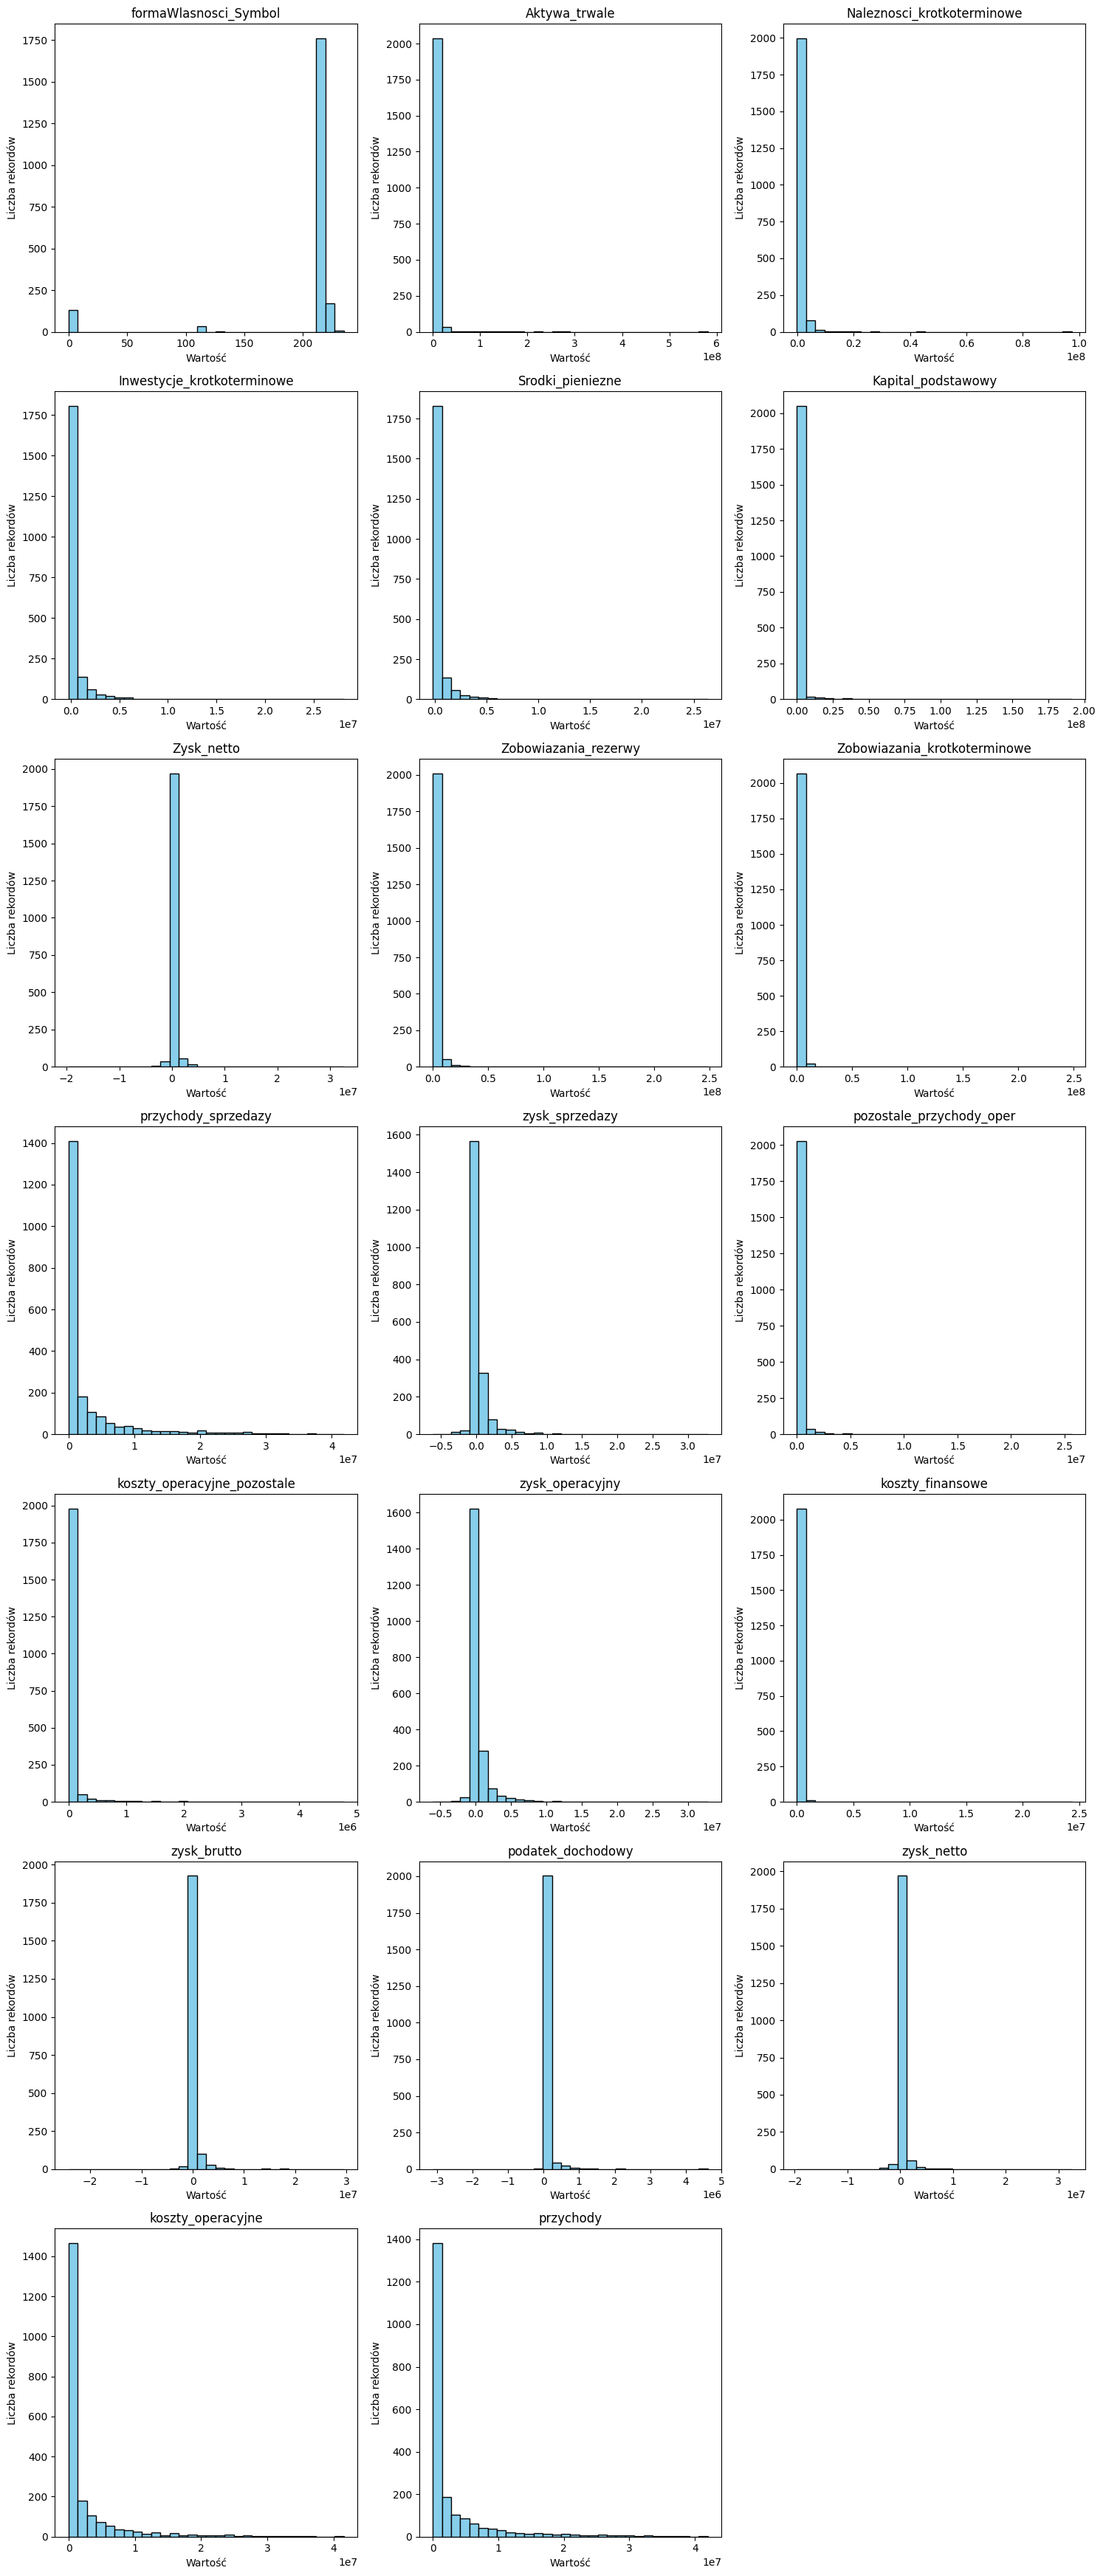

In [189]:
n_cols = len(cols_5_50_percent)
n_rows = (n_cols // 3) + 1 

fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(cols_5_50_percent):
    axes[i].hist(df_train[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Wartość')
    axes[i].set_ylabel('Liczba rekordów')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### Rozkłady skośne - do imputacji lepsza może być mediana

##### Kolumny ze wskaźnikami, które mają 0/nan

In [190]:
wsk_cols = [col for col in df_train.columns if col.startswith('wsk')]

wsk_cols_with_issues = [col for col in wsk_cols 
                        if df_train[col].isna().any() or (df_train[col] == 0).any()]

In [191]:
len(wsk_cols_with_issues)

130

#### Trzeba sprawdzić, które wskaźniki można uzupełnić po zaimputowaniu kolumn medianą; pozostałe do usunięcia

In [192]:
cols_to_impute = [
    'Aktywa', 'Aktywa_trwale', 'Aktywa_obrotowe', 'Naleznosci_krotkoterminowe',
    'Inwestycje_krotkoterminowe', 'Srodki_pieniezne', 'Kapital_wlasny', 'Kapital_podstawowy',
    'Zysk_netto', 'Zobowiazania_rezerwy', 'Zobowiazania_krotkoterminowe',
    'przychody_sprzedazy', 'zysk_sprzedazy', 'pozostale_przychody_oper', 'koszty_operacyjne_pozostale',
    'zysk_operacyjny', 'koszty_finansowe', 'zysk_brutto', 'podatek_dochodowy',
]

for col in cols_to_impute:
    median_val = df_train.loc[df_train[col] != 0, col].median()
    df_train[col] = df_train[col].replace(0, np.nan)     
    df_train[col].fillna(median_val, inplace=True)  

mode_val = df_train['formaWlasnosci_Symbol'].mode()[0]
df_train['formaWlasnosci_Symbol'].fillna(mode_val, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5344\317216502.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[col].fillna(median_val, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_5344\317216502.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Dwa podejścia do wskaźników:
1. Wykorzystanie LLM do zdefiniowania, które wskaźniki da się wyznaczyć z tych kolumn, które pozostały i zostały uzupełnione medianą, usunięcie pozostałych.
2. Uzupełnienie wskaźników średnią (tam gdzie nie brakuje jakoś dużo wartości).